In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import matplotlib
random.seed(42)

%matplotlib inline

In [61]:
IMAGE_SIZE = (70, 70)

In [62]:
def get_image_intensity_histogram(file_location):
    image = cv2.imread(file_location)
    resized_image = cv2.resize(image, IMAGE_SIZE, interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    # perform histogram equalization to enhance the contrast
    gray = cv2.equalizeHist(gray)
    
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    return np.squeeze(hist), resized_image
    

In [63]:
def get_image_threshold_histogram(file_location):
    image = cv2.imread(file_location)
    
    if image.shape[0] != IMAGE_SIZE[0] or image.shape[1] != IMAGE_SIZE[1]:
        resized_image = cv2.resize(image, IMAGE_SIZE, interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
    
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    # th3 = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    _, th1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(th1, cmap='gray')

## Check the generated features

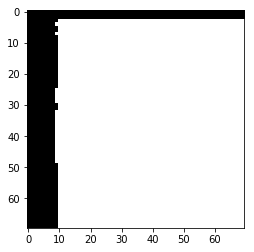

In [42]:
img_location = "H:\\AR-ExtendingOnlineGames\\data\\myboard_images\\empty\\g_5.jpg"
get_image_threshold_histogram(img_location)

[  7.  12.  13.  29.   0.  42.   0.   0.  53.   0.  46.   0.  29.  30.
  12.  19.  12.  21.  18.  33.  14.  22.   0.  33.  25.  19.  20.   0.
  24.  17.  31.  25.  20.   0.  24.  26.  27.  16.  20.  21.  15.  22.
  21.  16.  22.  19.  18.  18.  20.  18.  19.  22.  17.  19.  19.  22.
  19.  19.  10.  20.  29.  18.  17.   9.  14.  23.  32.   0.  37.  17.
   0.  27.  33.   0.  24.   0.  39.  34.   0.  41.   0.   0.  43.   0.
  53.   0.   0.   0.  65.   0.   0.  51.   0.   0.   0.   0.   0. 128.
   0.   0.   0.   0.   0.   0.   0. 142.   0.   0.   0.   0.   0.   0.
   0.   0. 173.   0.   0.   0.   0.   0.   0.   0.   0. 188.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 208.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 269.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 375.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

<Container object of 256 artists>

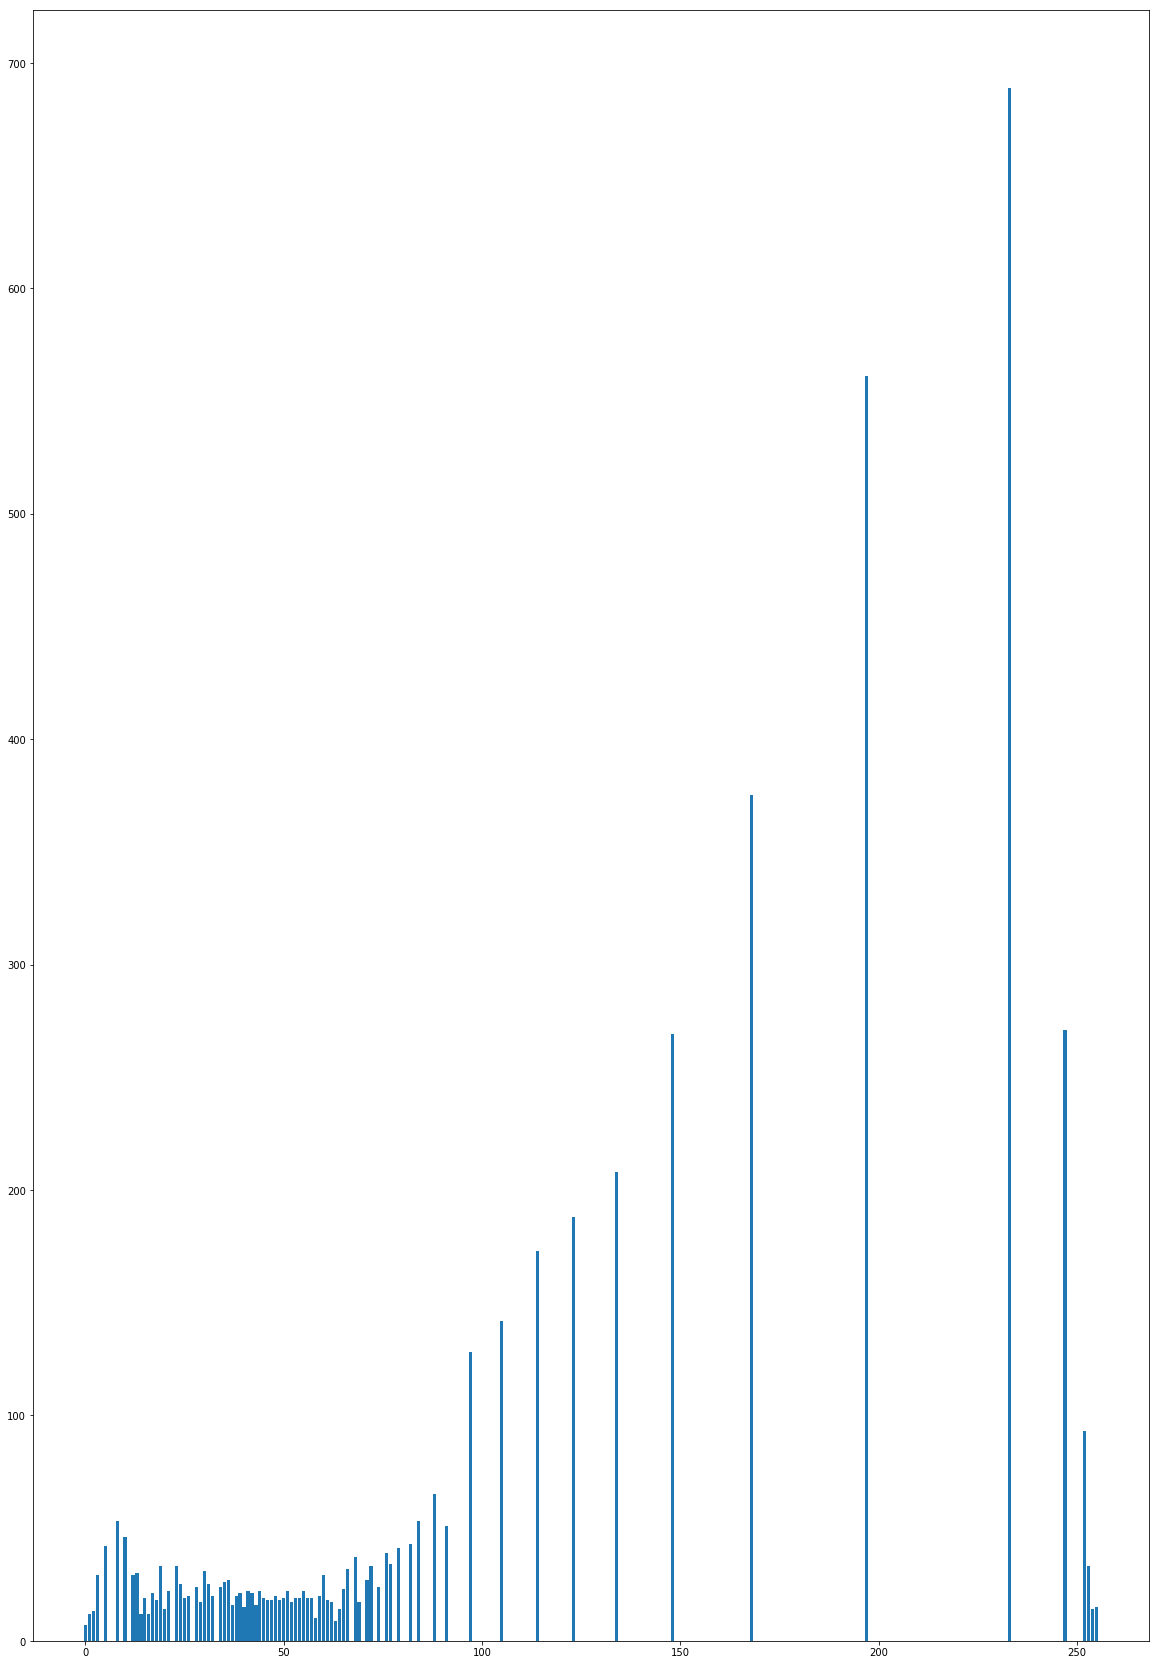

In [25]:
matplotlib.rcParams['figure.figsize'] = [20, 30]

img_location = "H:\\AR-ExtendingOnlineGames\\data\\myboard_images\\empty\\g_5.jpg"
intensities = get_image_intensity_histogram(img_location)
#plt.imshow(cv2.imread(img_location))
print(intensities)
plt.bar(list([x for x in range(256)]), intensities)

#plt.hist(intensities)

## Split into train and test data

In [64]:
def get_features_labels(data_path):
    X, y = [], []
    features_with_labels = []
    for fol in os.listdir(data_path):
        fol_path = os.path.join(data_path, fol)
        if os.path.isdir(fol_path):
            for file in os.listdir(fol_path):
                if ".jpg" in file:
                    label = -1

                    if fol[0] == "b":
                        label = 0
                    elif fol[0] == "w":
                        label = 1
                    elif fol == "empty":
                        label = 2

                    if label != -1:
                        complete_file_loc = os.path.join(fol_path, file)
                        intensity_hist, original_image = get_image_intensity_histogram(complete_file_loc)
                        features_with_labels.append({"feature": intensity_hist, "label": label, "original_image": original_image})
            
                    
    random.shuffle(features_with_labels)
    #print(X[0][0])
    #print(X[0][1])
    X = [x["feature"] for x in features_with_labels]
    y = [x["label"] for x in features_with_labels]
    original_images = [x["original_image"] for x in features_with_labels]

    return np.array(X), np.array(y), original_images

In [5]:
X_train, y_train, _ = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\train")
X_test, y_test, _ = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\test")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10360, 256)
(10360,)
(189, 256)
(189,)


In [6]:
import itertools
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def generate_performance_results(actual, predicted):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["black", "white", "empty"], title='Confusion matrix, without normalization')
    
    print("\nPrecision, recall, F score and support (per class): ")
    print(precision_recall_fscore_support(actual, predicted))
    print("\nAccuracy")
    print(accuracy_score(actual, predicted))

## Train the XGB model on the chess ID images and validate on the validation set

G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(189,)
Confusion matrix, without normalization
[[89  0  1]
 [ 0 95  0]
 [ 0  0  4]]

Precision, recall, F score and support (per class): 
(array([1. , 1. , 0.8]), array([0.99, 1.  , 1.  ]), array([0.99, 1.  , 0.89]), array([90, 95,  4], dtype=int64))

Accuracy
0.9947089947089947


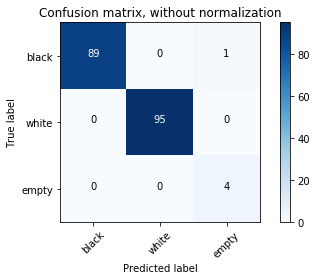

In [7]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.05, objective= 'multi:softmax', num_class=3).fit(X_train, y_train)
y_test_prections = gbm.predict(X_test)
y_train_predictions = gbm.predict(X_train)
print(y_test_prections.shape)

generate_performance_results(y_test, y_test_prections)

## Check predictions on the images taken on my chess board

(64, 256)
(64,)
(64,)
Confusion matrix, without normalization
[[ 2  3  2]
 [ 1  8  0]
 [11  5 32]]

Precision, recall, F score and support (per class): 
(array([0.14, 0.5 , 0.94]), array([0.29, 0.89, 0.67]), array([0.19, 0.64, 0.78]), array([ 7,  9, 48], dtype=int64))

Accuracy
0.65625


G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


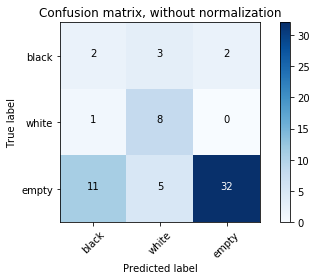

In [65]:
X_new, y_new, X_new_images = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\myboard_images")
print(X_new.shape)
print(y_new.shape)

y_new_predictions = gbm.predict(X_new)
print(y_new_predictions.shape)

generate_performance_results(y_new, y_new_predictions)

## Analyze the failed images

In [66]:
y_results = y_new ^ y_new_predictions
y_results

array([2, 0, 3, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 3, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 3],
      dtype=int32)

In [67]:
failed_image_indices = np.nonzero(y_results)
failed_image_indices

(array([ 0,  2,  4,  5,  7, 13, 14, 18, 20, 26, 28, 30, 32, 33, 42, 46, 48,
        52, 55, 60, 62, 63], dtype=int64),)

In [68]:
failed_image_indices[0]

array([ 0,  2,  4,  5,  7, 13, 14, 18, 20, 26, 28, 30, 32, 33, 42, 46, 48,
       52, 55, 60, 62, 63], dtype=int64)

22
5
5


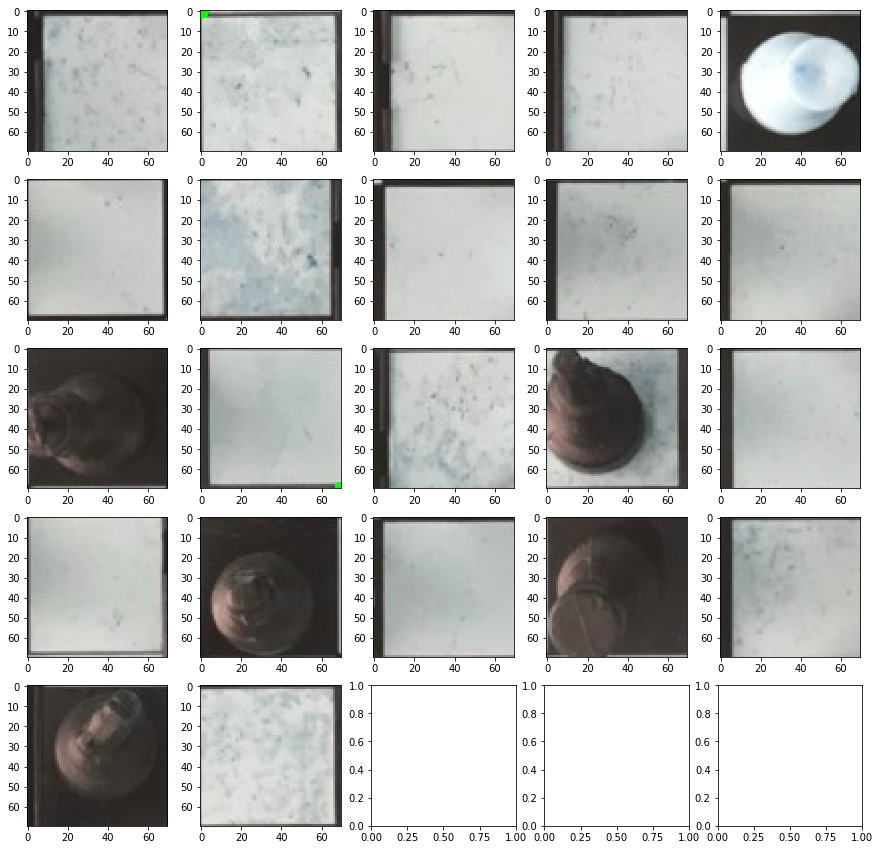

In [72]:
matplotlib.rcParams['figure.figsize'] = [15, 15]

num_failed_images = len(failed_image_indices[0])
num_images_per_row = 5
num_rows = (num_failed_images // num_images_per_row) + 1

print(num_failed_images)
print(num_rows)
print(num_images_per_row)


fig, axes = plt.subplots(num_rows, num_images_per_row)

current_image_idx = 0


for itr in range(num_rows):
    #print(itr)
    for jtr in range(num_images_per_row):
        if current_image_idx == num_failed_images:
            break
            
        axes[itr, jtr].imshow(X_new_images[failed_image_indices[0][current_image_idx]], cmap='gray')
        #print(current_image_idx)
        current_image_idx += 1